# Titanic - Machine Learning from Disaster

This is my first ML project.
The goal is to predict if a passenger survived the sinking of the Titanic or not.

Data used : https://www.kaggle.com/c/titanic/data

### Workflow stages : 

    1. Data understanding and exploration
    2. Data Preprocessing
    3. Model building 
    4. Model evaluation

### Import libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 1. Data understanding and exploration

#### 1.1 Import Data

In [2]:
df_train = pd.read_csv('data\\train.csv')
df_test = pd.read_csv('data\\test.csv')

#### 1.2 Data understanding

In [3]:
print('features available in the dataset are : ')
print(df_train.columns.values)

print('\nNumeric features are :')
print(df_train.describe().columns.tolist())

features available in the dataset are : 
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

Numeric features are :
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [4]:
# preview the data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Continous features are : Age, Fare. Discrete: SibSp, Parch.
- Categorical features are : Survived, Sex, and Embarked. Ordinal: Pclass.
--------------

In [5]:
# look at numeric and categorical values separately 
df_num = df_train[['Age','SibSp','Parch','Fare']]
df_cat = df_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

C:\Users\mooud\anaconda3\envs\bootcamp\lib\site-packages\numpy\lib\histograms.py:834: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mooud\anaconda3\envs\bootcamp\lib\site-packages\numpy\lib\histograms.py:835: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


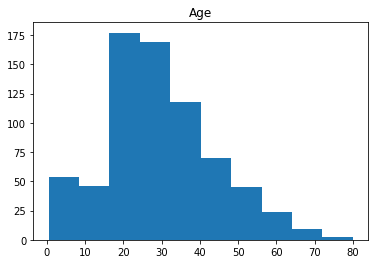

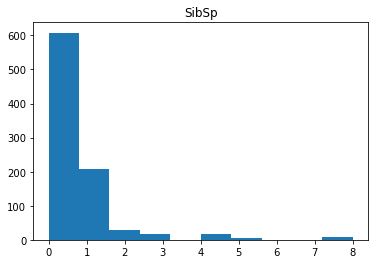

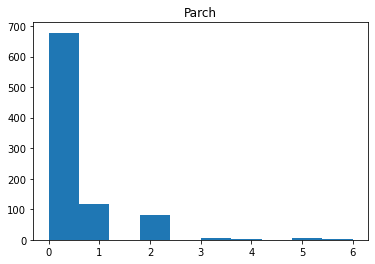

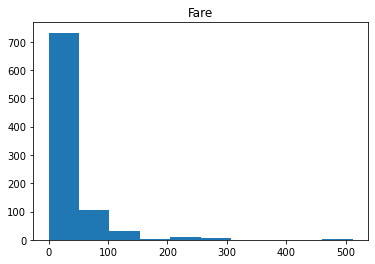

In [6]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [7]:
print(df_train.info())
print('*'*50)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

-------------
**Data types :** 

  - Train dataset : 07 features are integers / floats and 05 are strings.
  - Test dataset  : 06 features are integers / floats and 05 are strings.
  
**Null values :**

  - Train dataset : Cabin > Age > Embarked.
  - Test dataset  : Cabin > Age.
-------------

#### 1.3 Data analysis

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


----------------------------
- Total samples : 891.
- Output (Survived) : categorical feature with 0 or 1 values.
    - 38% samples survived.
    - (> 75%) of passengers did not travel with siblings.
    - Fares varied significantly with few passengers paying as high as $512.
    - Few elderly passengers within age range 65-80.
----------------------------

      Sex  Survived
0  female  0.742038
1    male  0.188908


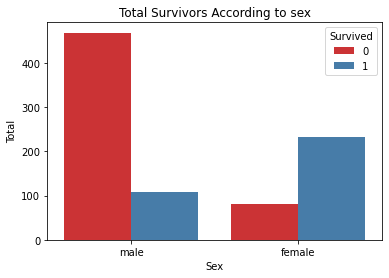

In [9]:
#Analyze by pivoting features
# How many passengers Lived or Dies according to sex
print(df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False))

# Visualization
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set1', data = df_train)
ax.set(title = 'Total Survivors According to sex', 
       xlabel = 'Sex', ylabel = 'Total')
plt.show()

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


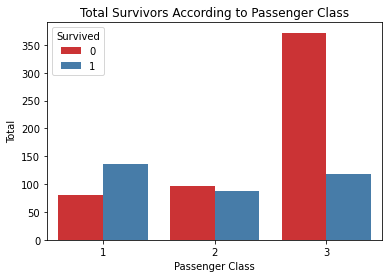

In [10]:
# How many passengers Lived or Dies in each Passenger Class
print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False))

# Visualization
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1', data = df_train)
ax.set(title = 'Total Survivors According to Passenger Class', 
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


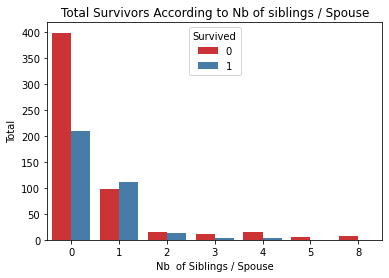

In [11]:
# How many passengers Lived or Dies according to number of siblings
print(df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending=False))

# Visualization
ax = sns.countplot(x = 'SibSp', hue = 'Survived', palette = 'Set1', data = df_train)
ax.set(title = 'Total Survivors According to Nb of siblings / Spouse', 
       xlabel = 'Nb  of Siblings / Spouse', ylabel = 'Total')
plt.show()

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


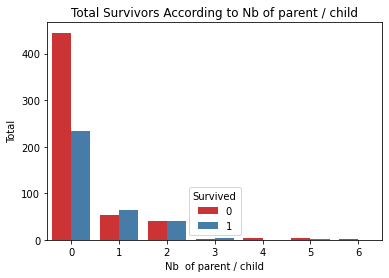

In [12]:
# How many passengers Lived or Dies according to number of siblings
print(df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

# Visualization
ax = sns.countplot(x = 'Parch', hue = 'Survived', palette = 'Set1', data = df_train)
ax.set(title = 'Total Survivors According to Nb of parent / child', 
       xlabel = 'Nb  of parent / child', ylabel = 'Total')
plt.show()

---------------
**Observations :**
We observe significant correlation among sex, age and Survived
- Women were more likely to have survived.
- Children were more likely to have survived.
- The upper-class passengers (Pclass=1) were more likely to have survived.
- Significant correlation among Pclass=1 and Survived.
- SibSp and Parch have zero correlation for certain values.
-------------

#### Correlating numerical features
Correlations between numerical features and our output (Survived) to know how to deal with this kind of data (drop, categorize, completion ..)

In [13]:
df_num = df_num = df_train[['Age','SibSp','Parch','Fare', 'Survived']]

               Age     SibSp     Parch      Fare  Survived
Age       1.000000 -0.308247 -0.189119  0.096067 -0.077221
SibSp    -0.308247  1.000000  0.414838  0.159651 -0.035322
Parch    -0.189119  0.414838  1.000000  0.216225  0.081629
Fare      0.096067  0.159651  0.216225  1.000000  0.257307
Survived -0.077221 -0.035322  0.081629  0.257307  1.000000


<AxesSubplot:>

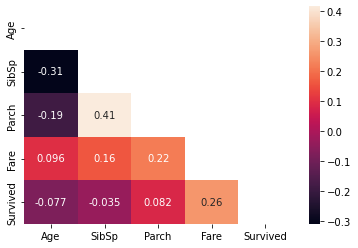

In [14]:
# Age Feature
corr= df_num.corr()
print(corr)

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)

C:\Users\mooud\anaconda3\envs\bootcamp\lib\site-packages\numpy\lib\histograms.py:834: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mooud\anaconda3\envs\bootcamp\lib\site-packages\numpy\lib\histograms.py:835: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


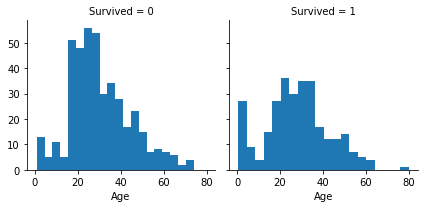

In [15]:
# Age 
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Observations.**
- Age <=4 :  had high survival rate.
- Age = 80 : survived.
- Age = 15-25 : most did not survive.
- Most passengers are in 15-35 age range.

**Decisions.**
- We should consider Age in our model training.
- Complete the Age feature for null values
- We should band age groups .

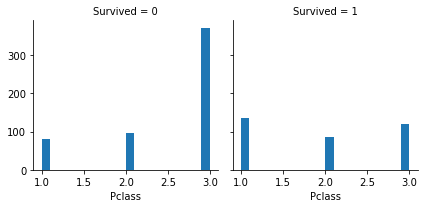

In [16]:
# Passenger Class
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

**Observations.**

- Pclass=3 had most passengers, and most did not survive.
- Most passengers in Pclass=1 survived. 

**Decisions.**

- Consider Pclass for model training.

#### Correlating categorical features
Correlate categorical features with our solution goal.

C:\Users\mooud\anaconda3\envs\bootcamp\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mooud\anaconda3\envs\bootcamp\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


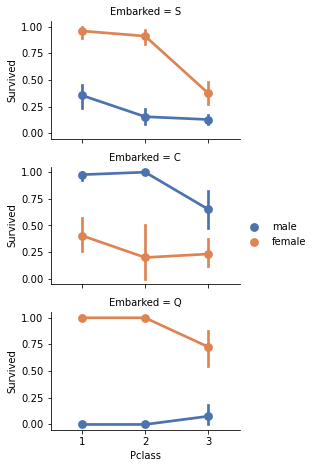

In [17]:
# Embarked
grid = sns.FacetGrid(df_train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\mooud\anaconda3\envs\bootcamp\lib\site-packages\numpy\lib\histograms.py:834: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mooud\anaconda3\envs\bootcamp\lib\site-packages\numpy\lib\histograms.py:835: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


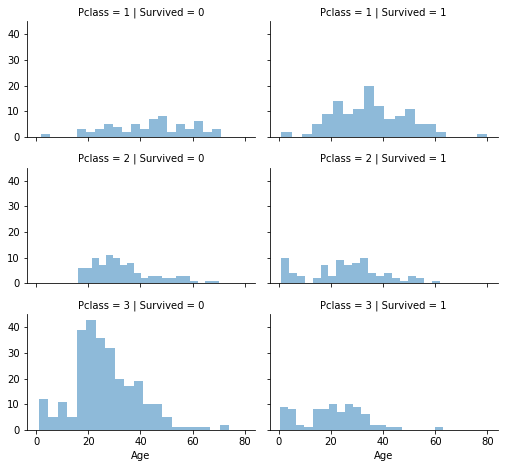

In [18]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\mooud\anaconda3\envs\bootcamp\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


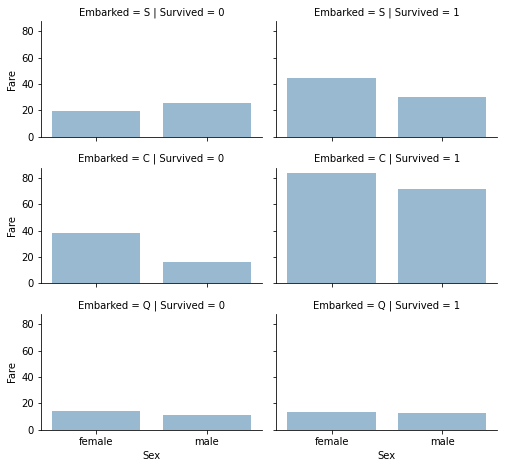

In [19]:
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Observations.**

- Female passengers had much better survival rate than males.
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. 
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.
- Higher fare paying passengers had better survival.
- Port of embarkation correlates with survival rates.

**Decisions.**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.
- Consider banding Fare feature.

### 2. Data Preprocessing

#### 2.1 Create new feature combining existing features
Create a new features FamilySize and IsAlone which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [20]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [21]:
df_train['IsAlone'] = df_train.FamilySize.apply(lambda x : 1 if x == 1 else 0)
df_test['IsAlone'] = df_test.FamilySize.apply(lambda x : 1 if x == 1 else 0)

In [22]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


#### 2.2 Dropping features
- Before dropping Name feature, we observe that we can extract titles from it.
- Drop the Cabin and Ticket features.
- Drop Name and PassengerId features
- Drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [23]:
# Extract Title feature using regular expressions.(match the first word which ends with a dot character)
df_train['Title'] = df_train.Name.str.extract('([A-Za-z]+)\.', expand = False)
df_test['Title'] = df_test.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [24]:
print(df_train['Title'].value_counts())
print('*'*30)
print(df_test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Lady          1
Countess      1
Jonkheer      1
Ms            1
Mme           1
Capt          1
Don           1
Name: Title, dtype: int64
******************************
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64


We can replace 'Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona' titles with a more common name or classify them as `Rare.

In [25]:
for dataset in [df_train, df_test]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [26]:
print(df_train['Title'].value_counts())
print('*'*30)
print(df_test['Title'].value_counts())

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64
******************************
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64


In [27]:
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


In [29]:
print('Train / test shape before dropping :', df_train.shape, ' ', df_test.shape)
df_train = df_train.drop(['Cabin', 'Ticket'], axis=1)
df_test = df_test.drop(['Cabin', 'Ticket'], axis=1)
df_train = df_train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
print('Train / test shape after dropping :', df_train.shape, ' ', df_test.shape)

Train / test shape before dropping : (891, 15)   (418, 14)
Train / test shape after dropping : (891, 8)   (418, 8)


In [30]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,male,22.0,7.2500,S,0,Mr
1,1,1,female,38.0,71.2833,C,0,Mrs
2,1,3,female,26.0,7.9250,S,1,Miss
3,1,1,female,35.0,53.1000,S,0,Mrs
4,0,3,male,35.0,8.0500,S,1,Mr


#### 2.2 Fill missing values
- Complete age and Fare with median values
- Create new categorie 0 for unknown title
- Embarked feature takes S, Q, C values. The training dataset has two missing values. We simply fill these with the most common occurance.

In [31]:
for ds in [df_train, df_test]:
    ds['Age'] = ds['Age'].fillna(ds['Age'].median())
    ds['Fare'] = ds['Fare'].fillna(ds['Fare'].median())

In [32]:
df_train['Title'] = df_train['Title'].fillna(0)
df_test['Title'] = df_test['Title'].fillna(0)

In [33]:
freq_port = df_train.Embarked.mode()[0]
df_train['Embarked'] = df_train['Embarked'].fillna(freq_port)

In [34]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
IsAlone     0
Title       0
dtype: int64

#### 2.3 Convert categorical features to numerical

In [35]:
# Sex feature
df_train['Sex'] = df_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df_test['Sex'] = df_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [36]:
# Embarked Feature
df_train['Embarked'] = df_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df_test['Embarked'] = df_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [37]:
# Title feature
df_train['Title'] = df_train['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
df_test['Title'] = df_test['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

In [38]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,0,22.0,7.2500,0,0,1
1,1,1,1,38.0,71.2833,1,0,3
2,1,3,1,26.0,7.9250,0,1,2
3,1,1,1,35.0,53.1000,0,0,3
4,0,3,0,35.0,8.0500,0,1,1


#### 2.4 Convert Continous features to bands
Creat bands for Age and Fare

In [39]:
# Check correlation between created bands and survived
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [40]:
# Create categorical goups for Age
for dataset in [df_train, df_test]:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [41]:
df_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title,AgeBand
0,0,3,0,1.0,7.2500,0,0,1,"(16.336, 32.252]"
1,1,1,1,2.0,71.2833,1,0,3,"(32.252, 48.168]"
2,1,3,1,1.0,7.9250,0,1,2,"(16.336, 32.252]"
3,1,1,1,2.0,53.1000,0,0,3,"(32.252, 48.168]"
4,0,3,0,2.0,8.0500,0,1,1,"(32.252, 48.168]"
5,0,3,0,1.0,8.4583,2,1,1,"(16.336, 32.252]"
6,0,1,0,3.0,51.8625,0,1,1,"(48.168, 64.084]"
7,0,3,0,0.0,21.0750,0,0,4,"(0.34, 16.336]"
8,1,3,1,1.0,11.1333,0,0,3,"(16.336, 32.252]"
9,1,2,1,0.0,30.0708,1,0,3,"(0.34, 16.336]"


In [42]:
# drop AgeBand
df_train = df_train.drop(['AgeBand'], axis=1)

In [43]:
# Check correlation between created Fareband and survived
#using qcut : unequal size bins and equal frequency
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [44]:
for dataset in [df_train, df_test]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title,FareBand
0,0,3,0,1.0,0,0,0,1,"(-0.001, 7.91]"
1,1,1,1,2.0,3,1,0,3,"(31.0, 512.329]"
2,1,3,1,1.0,1,0,1,2,"(7.91, 14.454]"
3,1,1,1,2.0,3,0,0,3,"(31.0, 512.329]"
4,0,3,0,2.0,1,0,1,1,"(7.91, 14.454]"
5,0,3,0,1.0,1,2,1,1,"(7.91, 14.454]"
6,0,1,0,3.0,3,0,1,1,"(31.0, 512.329]"
7,0,3,0,0.0,2,0,0,4,"(14.454, 31.0]"
8,1,3,1,1.0,1,0,0,3,"(7.91, 14.454]"
9,1,2,1,0.0,2,1,0,3,"(14.454, 31.0]"


In [45]:
# Drop FareBand
df_train = df_train.drop(['FareBand'], axis=1)

### 3 Model building

Our problem is a classification and regression problem with supervised learning. Let see how various different models perform with default parameters.:

    Logistic Regression
    k-Nearest Neighbors (KNN)
    Support Vector Machines
    Naive Bayes classifier
    Decision Tree
    Random Forrest
    Perceptron
    Artificial neural network
    RVM or Relevance Vector Machine

In [46]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [47]:
print(X_test.head())

   Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0       3    0  2.0     0         2        1      1
1       3    1  2.0     0         0        0      3
2       2    0  3.0     1         2        1      1
3       3    0  1.0     1         0        1      1
4       3    1  1.0     1         0        0      3


#### 3.1 Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.56

#### 3.2 k-Nearest Neighbors (KNN)
k-Nearest Neighbors algorithm is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.19

#### 3.4 Support Vector Machines
Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [50]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.45

#### 3.5 Gaussian Naive Bayes
Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

In [51]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.99

#### 3.6 Perceptron
The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [52]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

80.58

#### 3.7 Linear SVC
The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

In [53]:
linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.23

#### 3.8 Stochastic Gradient Descent
Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the very high computational burden, achieving faster iterations in trade for a lower convergence rate.

In [54]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.29

#### 3.9 Decision Tree
This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [55]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.98

#### 3.10 Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [56]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.98

### 3 Model evaluation

Rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [57]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.98
8,Decision Tree,86.98
1,KNN,85.19
5,Perceptron,80.58
2,Logistic Regression,78.56
0,Support Vector Machines,78.45
7,Linear SVC,78.23
4,Naive Bayes,76.99
6,Stochastic Gradient Decent,73.29
